# First Pass
Using the "LiveAlumni founders cofounders owners Sept 2021" Dataset to:
1) Analyze characteristics about founders
2) Make a simple prediction algorithm using the data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
found_cofound_own = pd.read_csv("LiveAlumni founders cofounders owners Sept 2021.csv", sep=",", encoding='cp1252')
found = pd.read_csv("LiveAlumni founders 07192023.csv", sep=",", encoding='cp1252')
merged = found_cofound_own.drop(["Education Degree", "Education Major", "_TotalCount_", 'Employment Start Year.1', 'Education Employment difference'], axis=1)
merged = pd.merge(merged, found, how='inner', on=list(merged.columns))

# print(merged)

### Average Education - Employment Difference

In [3]:
# access only columns with years or relating to years
years = found_cofound_own.filter(items=["Employment Start Month","Employment Start Year", "Education Start Date", 
"Education End Date", "Education Employment difference"])

# drop incomplete rows
# with_na = len(years)
years = years.dropna()
# without_na = len(years)

# filter out outliers and extraneous data
years_diff_cleaned = years.filter(items=["Education Employment difference"])
years_diff_cleaned = years_diff_cleaned[abs(years_diff_cleaned["Education Employment difference"]) < 100]
# drop incomplete rows
years_diff_cleaned = years_diff_cleaned.dropna()

# debugging
# print(years_diff_cleaned)
# print(years)
# print(f"Number of rows dropped: {with_na - without_na}")

   Education Employment difference
0                                5
Education Employment difference    14.008374
dtype: float64
Education Employment difference    12.0
dtype: float64


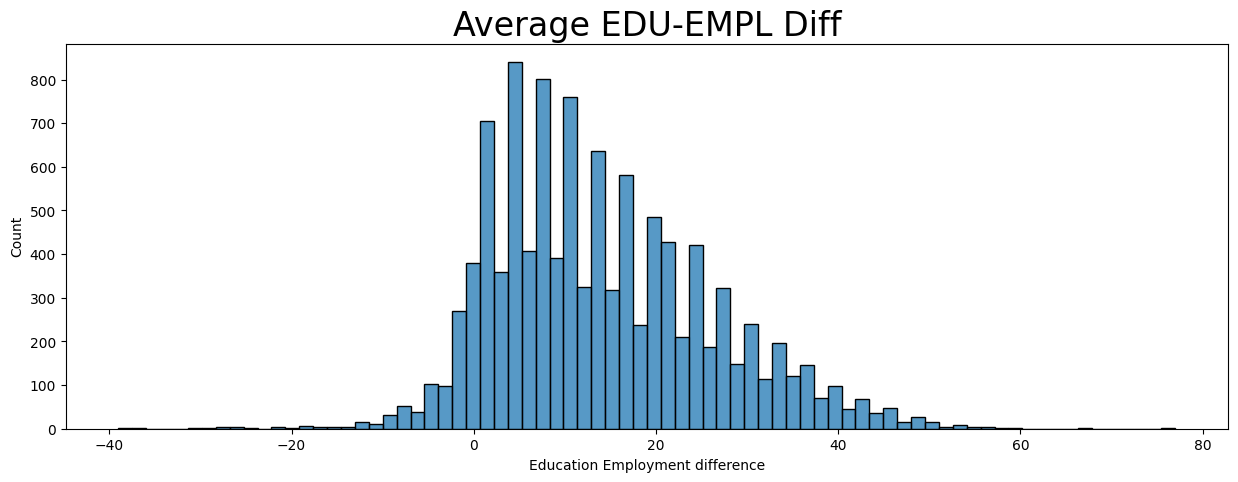

In [6]:
fig, ax = plt.subplots(1, figsize=(15,5))
sns.histplot(years_diff_cleaned["Education Employment difference"])

ax.set_title('Average EDU-EMPL Diff', fontsize=24)
# ax.axvline(, color='k', linestyle='-.', label='In data')
print(years_diff_cleaned.mode())
print(years_diff_cleaned.mean())
print(years_diff_cleaned.median())


### Most Frequent Employment Titles